In [539]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as smf
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 500)

%matplotlib inline

In [422]:
estimate = pd.read_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Quarter_Data.csv',thousands = ',')

In [423]:
estimate['FREQ_S'] = 1 / (estimate['HEADWAY_S'] / 60.0)

In [424]:
estimate['NUM_BUS_STOPS'] = estimate['NUM_BUS_STOPS'] - 1

In [425]:
max(estimate.RUNSPEED_S)

27.25

In [426]:
max(estimate.TOTSPEED_S)

27.25

In [427]:
min(estimate.TOTSPEED_S)

0.0

In [428]:
min(estimate.RUNSPEED_S)

0.0

In [429]:
drop = ['Unnamed: 0',
'STOP_LAT_x',
'STOP_LON_x',
'STOP_LAT_y',
'STOP_LON_y',
'geometry',
'index_right',
'ALAND00',
'AWATER00',
'COUNTYFP00',
'CTIDFP00',
'NAME00',
'TRACTCE00',
'Id',
'Id2',
'Geography',
'geometry_e',
'geometry_f',
'STOP_LAT',
'STOP_LON',
'FID_1']

In [430]:
estimate = estimate.drop(drop,axis = 1)

In [431]:
change = ['BART_FROMS','BART_TOS','ON_BUS','OFF_BUS','CALTRAIN_OFF','CALTRAIN_ON','NUM_BUS_STOPS']

In [432]:
for column in change:
    estimate[column] = estimate[column].fillna(0)

In [433]:
estimate.columns

Index(['ROUTE_SHORT_NAME', 'STOP_ID', 'DIR', 'SEQ', 'HEADWAY_S', 'EOL', 'SOL',
       'DWELL_S', 'RUNTIME_S', 'TOTTIME_S', 'SERVMILES_S', 'RUNSPEED_S',
       'TOTSPEED_S', 'Route', 'STOP', 'Boardings', 'Alightings', 'STOP NAME_x',
       'STOP NAME_y', 'Total_Pop', 'Total_Housing_Units',
       'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)', 'VAC_RATE',
       'OCC_RATE', 'PER_INCOME_0-15', 'PER_INCOME_15-50', 'PER_INCOME_50-100',
       'PER_INCOME_100+', 'AVG_HH_SIZE', 'PER_HH_0VEH', 'POP_DEN_ACS',
       'HH_DEN_ACS', 'HU_DEN_ACS', 'BART_TOS', 'BART_FROMS', 'CALTRAIN_OFF',
       'CALTRAIN_ON', 'ON_BUS', 'HEADWAY_S_BUS', 'ONTIME5_BUS', 'OFF_BUS',
       'NUM_BUS_STOPS', 'EDHLTH_RAC_SCALED', 'EDHLTH_WAC_SCALED',
       'EMP_RAC_SCALED', 'EMP_WAC_SCALED', 'LEISER_RAC_SCALED',
       'LEISER_WAC_SCALED', 'OTHER_RAC_SCALED', 'OTHER_WAC_SCALED',
       'RETAIL_RAC_SCALED', 'RETAIL_WAC_SCALED', 'HOUSING_09_SCALED',
       'EDD_EMP', 'geometry_d', 'Alightings_e', 'Boardings_e', 

In [434]:
change = ['Average Hourly Price',
'Count_',
'EDHLTH_RAC_SCALED',
'EDHLTH_WAC_SCALED',
'EMP_RAC_SCALED',
'EMP_WAC_SCALED',
'HOUSING_09_SCALED',
'LEISER_RAC_SCALED',
'LEISER_WAC_SCALED',
'OTHER_RAC_SCALED',
'OTHER_WAC_SCALED',
'PER_HH_0VEH',
'PER_INCOME_0-15',
'PER_INCOME_100+',
'PER_INCOME_15-50',
'PER_INCOME_50-100',
'PRICE12HR',
'PRICE1HR',
'PRICE2HR',
'PRICE3HR',
'PRICE4HR',
'PRICEDAY',
'PRICEDAYDISCOUNT',
'RETAIL_RAC_SCALED',
'RETAIL_WAC_SCALED',
'Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes)',
'parking_rate']

In [435]:
changes = ['PARK_HOURLY_AVG_ON',
'TRANSBAY',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'HOUSING_09_DEN',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'PARK_12_HR_OFF_PUB',
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'PARK_DAY_OFF_PUB',
'PARK_DAY_DISCOUNT_OFF_PUB',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'AVG_TT_TO_WORK_MINUTES',
'PARKING_RATE_OFF_RESIDENTIAL']



In [436]:
def rename_column(old_columns,new_columns,df):
    num = len(old_columns)
    count = 0
    while count < num:
        df[new_columns[count]] = df[old_columns[count]]
        df = df.drop(old_columns[count],axis = 1)
        
        count = count + 1
    return df

In [437]:
estimate = rename_column(change,changes,estimate)


In [438]:
estimate['EXCLUDE'] = 0
check = ['EMP_WAC_DEN','LEISER_RAC_DEN','LEISER_WAC_DEN','OTHER_RAC_DEN','OTHER_WAC_DEN','RETAIL_RAC_DEN','RETAIL_WAC_DEN','Boardings']
count = 0
for column in check:
    while count < len(estimate[column]):
        if np.isnan(estimate[column][count]):
                print('Got One')
                estimate['EXCLUDE'][count] = 1
        count = count + 1

Got One
Got One
Got One
Got One
Got One
Got One


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One
Got One


In [439]:
data = estimate[estimate['EXCLUDE'] == 0]

In [440]:
len(data)

249

In [441]:
len(data.STOP_ID.unique())

187

In [442]:
len(estimate)

318

In [443]:
estimate.head()

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE
0,J,3537,1,31.0,16.494541,0.0,0.0,0.0,118.166667,118.166667,21.122000,10.726667,10.726667,J-CHURCH,30th&Dolores,132,58,30th St & Dolores St,30th St & Dolores St,5393,2731,0.134017,0.865983,2.280338,44.138158,19.355970,22.351439,0.0,0.0,0.0,0.0,6227.275331,18.818346,0.617455,6073.213990,5,1198,POLYGON ((-122.4179404432807 37.74240321003582...,58,132,1,0.0,0.0,16.494541,J,10.726667,118.166667,J-CHURCH,31.0,21.122000,0.0,30th&Dolores,30th St & Dolores St,0,0,10.726667,118.166667,3.637567,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156871,0.040592,0.539535,0.142072,0.277801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.6,0.916922,1
1,J,3538,0,30.0,11.844587,0.0,0.0,0.0,103.073333,103.073333,13.884000,8.210000,8.210000,J-CHURCH,30th&Dolores,60,170,30th St & Dolores St,30th St & Dolores St,4462,1978,0.034884,0.965116,2.337349,36.016741,15.409224,15.966184,0.0,0.0,0.0,0.0,5729.213775,19.630164,0.623327,5910.024724,5,1190,POLYGON ((-122.4183714548281 37.74226923229441...,170,60,0,0.0,0.0,11.844587,J,8.210000,103.073333,J-CHURCH,30.0,13.884000,0.0,30th&Dolores,30th St & Dolores St,0,0,8.210000,103.073333,5.065605,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108434,0.049764,0.477737,0.161865,0.310634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.1,0.949750,1
2,J,3984,0,19.0,11.952080,0.0,0.0,0.0,196.470000,196.470000,26.061000,7.960000,7.960000,J-CHURCH,Church&16th,232,284,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2821.660012,19.940003,0.709521,2616.738748,12,3078,POLYGON ((-122.4226346215173 37.76472045210242...,284,232,0,0.0,0.0,11.952080,J,7.960000,196.470000,J-CHURCH,19.0,26.061000,0.0,Church&16th,Church St & 16th St,0,0,7.960000,196.470000,5.020047,0.0,0,691.873708,372.802523,3490.401978,1974.107566,3599.814424,486.532841,654.519996,2088.055658,768.925993,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.939771,177.859055,25.4,0.821434,0
3,J,3985,1,42.0,16.238964,0.0,0.0,0.0,205.400000,205.400000,26.814667,7.836667,7.836667,J-CHURCH,Church&16th,198,239,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2901.134529,19.408457,0.712519,2734.517124,10,2980,POLYGON ((-122.4225216409491 37.76448144627199...,239,198,1,0.0,0.0,16.238964,J,7.836667,205.400000,J-CHURCH,42.0,26.814667,0.0,Church&16th,Church St & 16th St,0,0,7.836667,205.400000,3.694817,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.4,NaN,1
4,J,3987,0,20.0,11.951084,0.0,0.0,0.0,196.470000,196.470000,25.942000,7.920000,7.920000,J-CHURCH,Church&18th,286,340,Church St & 18th St,Church St & 18th St,5334,2876,0.039638,0.960362,1.931209,38.104760,19.731036,20.545424,0.0,0.0,0.0,0.0,1053.420296,16.078590,0.648009,1088.560014,6,1867,POLYGON ((-122.4223288795259 37.76156643636237...,340,286,0,0.0,0.0,11.951084,J,7.920000,196.470000,J

In [444]:
data['AVG_RIDE'] = (data.Boardings + data.Alightings)/2

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [445]:
data['LOG_RIDERS'] = np.log(data.AVG_RIDE + 1)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [446]:
data['AVG_BART'] = (data['BART_FROMS']+data['BART_TOS'])/2
data['CALTRAIN_AVG'] = (data.CALTRAIN_OFF + data.CALTRAIN_ON)/2
data['MUNI_BUS_AVG'] = (data.ON_BUS + data.OFF_BUS)/2


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [447]:
log_change = ['PARK_12_HR_OFF_PUB',   
'PARK_1_HR_OFF_PUB',
'PARK_2_HR_OFF_PUB',
'PARK_3_HR_OFF_PUB',
'PARK_4_HR_OFF_PUB',
'AVG_BART',
'AVG_HH_SIZE',
'AVG_TT_TO_WORK_MINUTES',
'BART_FROMS',
'BART_TOS',
'CALTRAIN_AVG',
'CALTRAIN_OFF',
'CALTRAIN_ON',
'PARK_DAY_DISCOUNT_OFF_PUB',
'PARK_DAY_OFF_PUB',
'DWELL_S',
'EDD_EMP',
'EDHLTH_RAC_DEN',
'EDHLTH_WAC_DEN',
'EMP_RAC_DEN',
'EMP_WAC_DEN',
'FREQ_S',
'HEADWAY_S',
'HH_DEN_ACS',
'PARK_HOURLY_AVG_ON',
'HOUSING_09_DEN',
'HU_DEN_ACS',
'LEISER_RAC_DEN',
'LEISER_WAC_DEN',
'NUM_BUS_STOPS',
'OCC_RATE',
'OFF_BUS',
'ON_BUS',
'ONTIME5_BUS',
'OTHER_RAC_DEN',
'OTHER_WAC_DEN',
'PARKING_RATE_OFF_RESIDENTIAL',
'POP_DEN_ACS',
'RETAIL_RAC_DEN',
'RETAIL_WAC_DEN',
'RUNSPEED_S',
'RUNTIME_S',
'SHR_HH_0VEH',
'SHR_INCOME_0_15',
'SHR_INCOME_100P',
'SHR_INCOME_15_50',
'SHR_INCOME_50_100',
'TOTSPEED_S',
'TOTTIME_S',
'Total_Housing_Units',
'Total_Pop',
'VAC_RATE']



In [448]:
for column in log_change:
    data[column + '_LOG'] = data[column].apply(lambda value: np.log(value + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [449]:
def check(value):
    if value == 'N':
        value = ''
    else:
        value = value
    return value

In [450]:
data.AVG_TT_TO_WORK_MINUTES = data.AVG_TT_TO_WORK_MINUTES.convert_objects(convert_numeric = True)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [451]:
data['DIST_FROM_LAST_STOP'] = data['SERVMILES_S'] / (data['FREQ_S']*24)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


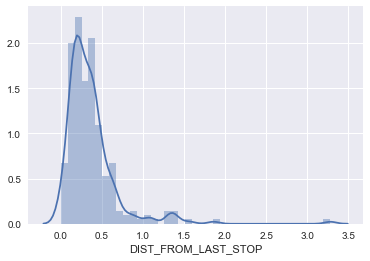

In [452]:
sns.distplot(data.DIST_FROM_LAST_STOP)

In [453]:
data['DIST_FROM_LAST_STOP_LOG'] = data['DIST_FROM_LAST_STOP'].apply(lambda value: np.log(value + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [454]:
data['SERVMILES_S_LOG'] = data['SERVMILES_S'].apply(lambda x : np.log(x + 1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [455]:
data['CAL_STATION'] = np.where(data['CALTRAIN_AVG'] > 0,1,0)


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [459]:
#this should be 0.5 for quarter mile buffers and .2 for tenth
data['CLOSE_STOP'] = np.where(data['DIST_FROM_LAST_STOP'] < 0.5, 1,0)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [460]:
data['EOL_SOL'] = data['EOL'] + data['SOL']

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [410]:
# Run 1
# Start with the final model for the bus ridership switching the muni and rail varaible places and eliminating
# variables that only could be obtained using the bus data
# -- good R-squared, but poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1527.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.14e-209
Time:                        17:01:28   Log-Likelihood:                -276.43
No. Observations:                 248   AIC:                             572.9
Df Residuals:                     238   BIC:                             608.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [240]:
# Run 2
# BART seems to causing the most trouble try the untransformed variable 
# -- made it worse, keep run 1

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1529.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          9.78e-210
Time:                        15:54:39   Log-Likelihood:                -276.28
No. Observations:                 248   AIC:                             572.6
Df Residuals:                     238   BIC:                             607.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [241]:
# Run 3
# Try BART Boardings 
# -- made it worse, keep run 1

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + BART_FROMS \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1530.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          9.33e-210
Time:                        15:54:40   Log-Likelihood:                -276.23
No. Observations:                 248   AIC:                             572.5
Df Residuals:                     238   BIC:                             607.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [242]:
# Run 4-6
# Try without BART Variable and try without Transbay and without both, compare to run 1
# -- 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:40   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [243]:
# Run 5

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1527.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.14e-209
Time:                        15:54:40   Log-Likelihood:                -276.43
No. Observations:                 248   AIC:                             572.9
Df Residuals:                     238   BIC:                             608.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [244]:
# Run 6
# Try without BART Variable and try without Transbay and without both, compare to run 1
# -- Both variables do not have a significant impact on the gof measures, so drop them both and stick with this


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [245]:
# Run 7-11
# Cal station is negative and non-significant try different variations of this variable
#Try the untransformed Boardings
# -- reject b/c poor p-value
mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_ON \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [246]:
# Run 8
# Try the untransformed Avg Ridership, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [247]:
# Run 9
# Try the transformed Avg Ridership, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_AVG_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [248]:
# Run 10
# Try the transformed Boardings, compare to run 6
# -- reject b/c of poor p value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + CALTRAIN_ON_LOG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1702.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.05e-211
Time:                        15:54:41   Log-Likelihood:                -276.57
No. Observations:                 248   AIC:                             571.1
Df Residuals:                     239   BIC:                             602.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [249]:
# Run 11
# Try without a Caltrain variable, compare to run 6
# -- Does not impact gof measures much, stick with this moving forward

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1910.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.54e-212
Time:                        15:54:42   Log-Likelihood:                -277.43
No. Observations:                 248   AIC:                             570.9
Df Residuals:                     240   BIC:                             599.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [250]:
# Run 12
# Try dropping close stop variable, because it does not make as much sense with rail (no limited/rapid lines)
# reject b/c gof measures drops and EOL_SOL is affected

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2105.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.76e-212
Time:                        15:54:42   Log-Likelihood:                -282.34
No. Observations:                 248   AIC:                             578.7
Df Residuals:                     241   BIC:                             603.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [413]:
# Run 13
# Try dropping EOL_SOL, because there may be some double play going on with the EOL/SOL always not having 
# a close stop nearby, compare to run 11

# -- gof measures are not impacted much, and the p-values all look good use this as the final tenth-mile model

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2454.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.32e-213
Time:                        17:01:47   Log-Likelihood:                -282.96
No. Observations:                 248   AIC:                             577.9
Df Residuals:                     242   BIC:                             599.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [418]:
# Run 14
# Try adding the travel time varaible in 
# -- the p-value for income is iffy and travel time is not only using rail

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2227.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.77e-215
Time:                        17:15:51   Log-Likelihood:                -275.48
No. Observations:                 248   AIC:                             565.0
Df Residuals:                     241   BIC:                             589.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [419]:
# Run 14
# Final Model (Tenth-mile Buffer)

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + MUNI_BUS_AVG \
                       -1",
             data = data)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2454.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.32e-213
Time:                        17:19:53   Log-Likelihood:                -282.96
No. Observations:                 248   AIC:                             577.9
Df Residuals:                     242   BIC:                             599.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

# Quarter-Mile Buffer Model

## Changed input file in first cell and ran through them again to get the transformed data

In [462]:
data_quart = data

In [299]:
data_quart.head()

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL
2,J,3984,0,19.0,11.952080,0.000000,0.000000,0.0,196.470000,196.470000,26.061000,7.960000,7.960000,J-CHURCH,Church&16th,232,284,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2821.660012,19.940003,0.709521,2616.738748,12,3078,POLYGON ((-122.4226346215173 37.76472045210242...,284,232,0,0.0,0.000000,11.952080,J,7.960000,196.470000,J-CHURCH,19.0,26.061000,0.000000,Church&16th,Church St & 16th St,0,0,7.960000,196.470000,5.020047,0.0,0,691.873708,372.802523,3490.401978,1974.107566,3599.814424,486.532841,654.519996,2088.055658,768.925993,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.939771,177.859055,25.4,0.821434,0,258.0,5.556828,0.0,0.0,2719.199380,NaN,NaN,NaN,NaN,NaN,0.000000,1.078096,3.273364,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.0,8.032360,6.540848,5.923728,8.158059,7.588378,1.795095,2.561256,3.177543,0.000000,8.188915,3.284807,6.189358,6.485429,2.564949,0.638866,7.870066,7.945435,0.536213,7.644467,6.646294,0.599624,3.819360,5.415833,5.186598,2.192770,5.285587,0.271084,0.032691,0.362076,0.160548,0.304766,2.192770,5.285587,7.505492,8.055792,0.100450,0.216308,0.195820,3.298094,0,0,0.000000
15,J,4006,1,44.0,16.241226,0.333333,0.000000,0.0,124.513333,124.513333,16.379333,7.890000,7.890000,J-CHURCH,Duboce&Church,642,385,Church St & Duboce Ave,Church St & Duboce Ave,3619,1831,0.028946,0.971054,2.035433,49.782441,24.457911,25.186972,0.0,0.0,0.0,0.0,4809.324489,20.660876,0.714613,4460.313671,12,2257,POLYGON ((-122.4229992384349 37.76940147085892...,385,642,1,0.0,0.333333,16.241226,J,7.890000,124.513333,J-CHURCH,44.0,16.379333,0.000000,Duboce&Church,Church St & Duboce Ave,0,0,7.890000,124.513333,3.694302,200.0,0,748.732235,77.416694,3755.376347,1987.813394,3760.773395,541.926845,694.675778,2218.437537,748.033807,0.349269,0.064679,0.448819,0.209224,0.277278,NaN,NaN,Na

In [300]:
# Run 1
# Start with the final model for the bus ridership switching the muni and rail varaible places and eliminating
# variables that only could be obtained using the bus data
# -- good R-squared, but poor p-values


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + CAL_STATION \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1275.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.22e-204
Time:                        16:00:31   Log-Likelihood:                -287.86
No. Observations:                 249   AIC:                             597.7
Df Residuals:                     238   BIC:                             636.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [311]:
# Run 2-6
# Drop all of the hgihly-insignificant variables and add back one at a time

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:09:18   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [316]:
# Run 3
# Add back income variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + SHR_INCOME_100P \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1744.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.45e-208
Time:                        16:12:25   Log-Likelihood:                -290.02
No. Observations:                 249   AIC:                             596.0
Df Residuals:                     241   BIC:                             624.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1660      0

In [317]:
# Run 4
# Add back parking variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.10e-208
Time:                        16:12:26   Log-Likelihood:                -289.73
No. Observations:                 249   AIC:                             595.5
Df Residuals:                     241   BIC:                             623.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [319]:
# Run 5
# Add back  variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + PARK_HOURLY_AVG_ON_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1748.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.10e-208
Time:                        16:13:53   Log-Likelihood:                -289.73
No. Observations:                 249   AIC:                             595.5
Df Residuals:                     241   BIC:                             623.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [322]:
# Run 6
# Add back caltrain station variable
# -- reject b/c of poor p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:14:29   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [328]:
# Stick with run 2, b/c the p-values all look good and the gof measures do not drop signifcantly 

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:18:45   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [329]:
# Run 7
# Try adding Mid-high income variable
# p-value is close, keep this for now b/c of interesting effect that higher income has on rail ridership

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:20:34   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [335]:
# Run 8-10
# Try adding Parking variable
# try residential parking 

# reject b/c of high p-values with other variables and neg coeff

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARKING_RATE_OFF_RESIDENTIAL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1497.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          9.66e-182
Time:                        16:26:04   Log-Likelihood:                -232.49
No. Observations:                 214   AIC:                             483.0
Df Residuals:                     205   BIC:                             513.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
EDD_EMP_LOG     

In [340]:
# Run 8
# Try adding off-street public parking
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARK_1_HR_OFF_PUB \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2214.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           3.92e-32
Time:                        16:27:14   Log-Likelihood:                -2.3859
No. Observations:                  31   AIC:                             18.77
Df Residuals:                      24   BIC:                             28.81
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2524      0

In [342]:
# Run 9
# Try adding off-street public parking
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + PARK_4_HR_OFF_PUB \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2210.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           4.00e-32
Time:                        16:27:48   Log-Likelihood:                -2.4120
No. Observations:                  31   AIC:                             18.82
Df Residuals:                      24   BIC:                             28.86
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2799      0

In [343]:
# Run 10
# Try adding off-street public parking

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:27:51   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [345]:
# Revert back to run 7 without a parking varaible

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:29:36   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [346]:
# Run 11-13
# try adding in caltrain variables 
#try caltrain boardings
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_ON \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1578.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.87e-208
Time:                        16:30:26   Log-Likelihood:                -287.37
No. Observations:                 249   AIC:                             592.7
Df Residuals:                     240   BIC:                             624.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1822      0

In [347]:
# Run 12
#try caltrain average ridership 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1578.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.87e-208
Time:                        16:31:01   Log-Likelihood:                -287.37
No. Observations:                 249   AIC:                             592.7
Df Residuals:                     240   BIC:                             624.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1822      0

In [349]:
# Run 13
#try caltrain average ridership log transformed varaible 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_AVG_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1576.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.79e-208
Time:                        16:31:24   Log-Likelihood:                -287.55
No. Observations:                 249   AIC:                             593.1
Df Residuals:                     240   BIC:                             624.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1833      0

In [350]:
# Run 13
#try caltrain boardings log transformed varaible 
# reject b/c of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + CALTRAIN_ON_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1575.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          6.00e-208
Time:                        16:31:45   Log-Likelihood:                -287.59
No. Observations:                 249   AIC:                             593.2
Df Residuals:                     240   BIC:                             624.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1835      0

In [351]:
# Revert back to run 7 without a caltrain variable

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1766.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.30e-209
Time:                        16:32:25   Log-Likelihood:                -288.49
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     241   BIC:                             621.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1864      0

In [357]:
# Run 14
# drop out the income variable
# gof measure does drop, but there are not any p-values above 0.05 
# keep run 7 because I like the income varaible

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     2000.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.56e-210
Time:                        16:40:15   Log-Likelihood:                -290.16
No. Observations:                 249   AIC:                             594.3
Df Residuals:                     242   BIC:                             618.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1722      0

In [361]:
# Run 15
# add in the average tt to work varaible, compare to run 7

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50_100 \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1576.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.56e-208
Time:                        16:47:57   Log-Likelihood:                -287.51
No. Observations:                 249   AIC:                             593.0
Df Residuals:                     240   BIC:                             624.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [366]:
# Run 16
# drop out the income varaible, but add the travel time varaible, compare to runs 7 and 14
# stick with this, I like the travel time varaible flipping signs with the bus model

# update added the travel time varaible to the bus model and the sign is negative, which follows my intuition 
    # of busses being used for short distance travel and rail being used for longer distances

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + AVG_TT_TO_WORK_MINUTES \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1769.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          2.70e-209
Time:                        16:53:18   Log-Likelihood:                -288.28
No. Observations:                 249   AIC:                             592.6
Df Residuals:                     241   BIC:                             620.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
EDD_EMP_LOG                0

In [463]:
# Run 17
# drop out the travel time variable, it is not mode specific
# stick with this moving forward

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1916.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          5.75e-208
Time:                        17:33:11   Log-Likelihood:                -295.39
No. Observations:                 249   AIC:                             604.8
Df Residuals:                     242   BIC:                             629.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2113      0

In [465]:
data_quart['SHR_INCOME_50P'] = data_quart.SHR_INCOME_100P + data_quart.SHR_INCOME_50_100
data_quart['SHR_INCOME_50P_LOG'] = data_quart.SHR_INCOME_50P.apply(lambda x: np.log(x+1))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [467]:
# Run 18
# try adding in 50P income variable 
# -- reject because of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + SHR_INCOME_50P_LOG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1680.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.25e-206
Time:                        17:39:23   Log-Likelihood:                -294.63
No. Observations:                 249   AIC:                             605.3
Df Residuals:                     241   BIC:                             633.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2013      0

In [483]:
def set_route_dummy(row,route):
    if row == route:
        value = 1
    else:
        value = 0
    return value

In [484]:
for name in data_quart.ROUTE_SHORT_NAME:
    data_quart[name] = data_quart['ROUTE_SHORT_NAME'].apply(lambda row: set_route_dummy(row,name))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [485]:
data_quart[data_quart['ROUTE_SHORT_NAME'] == 'J']

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,SHR_INCOME_50P,SHR_INCOME_50P_LOG,J,KT,L,M,N
2,J,3984,0,19.0,11.952080,0.000000,0.000000,0.0,196.470000,196.470000,26.061000,7.960000,7.960000,J-CHURCH,Church&16th,232,284,Church St & 16th St,Church St & 16th St,3151,1817,0.105669,0.894331,1.939077,44.575017,22.987751,25.703842,0.0,0.0,0.0,0.0,2821.660012,19.940003,0.709521,2616.738748,12,3078,POLYGON ((-122.4226346215173 37.76472045210242...,284,232,0,0.0,0.000000,11.952080,J,7.960000,196.470000,J-CHURCH,19.0,26.061000,0.000000,Church&16th,Church St & 16th St,0,0,7.960000,196.470000,5.020047,0.0,0,691.873708,372.802523,3490.401978,1974.107566,3599.814424,486.532841,654.519996,2088.055658,768.925993,0.311385,0.033231,0.436308,0.174154,0.356308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.939771,177.859055,25.4,0.821434,0,258.0,5.556828,0.0,0.0,2719.199380,NaN,NaN,NaN,NaN,NaN,0.000000,1.078096,3.273364,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,0.0,8.032360,6.540848,5.923728,8.158059,7.588378,1.795095,2.561256,3.177543,0.000000,8.188915,3.284807,6.189358,6.485429,2.564949,0.638866,7.870066,7.945435,0.536213,7.644467,6.646294,0.599624,3.819360,5.415833,5.186598,2.192770,5.285587,0.271084,0.032691,0.362076,0.160548,0.304766,2.192770,5.285587,7.505492,8.055792,0.100450,0.216308,0.195820,3.298094,0,1,0.000000,0.792615,0.583676,1,0,0,0,0
15,J,4006,1,44.0,16.241226,0.333333,0.000000,0.0,124.513333,124.513333,16.379333,7.890000,7.890000,J-CHURCH,Duboce&Church,642,385,Church St & Duboce Ave,Church St & Duboce Ave,3619,1831,0.028946,0.971054,2.035433,49.782441,24.457911,25.186972,0.0,0.0,0.0,0.0,4809.324489,20.660876,0.714613,4460.313671,12,2257,POLYGON ((-122.4229992384349 37.76940147085892...,385,642,1,0.0,0.333333,16.241226,J,7.890000,124.513333,J-CHURCH,44.0,16.379333,0.000000,Duboce&Church,Church St & Duboce Ave,0,0,7.890000,124.513333,3.694302,200.0,0,748.732235,77.416694,3755.376347,1987.813394,3760.773395,541.926845,694.675778,2218.

In [489]:
# Run 19
# try adding in the EOL and SOL
# -- reject because of high p-value

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + TRANSBAY \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.07e-206
Time:                        17:47:46   Log-Likelihood:                -294.46
No. Observations:                 249   AIC:                             604.9
Df Residuals:                     241   BIC:                             633.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2040      0

In [496]:
data_quart.ROUTE_SHORT_NAME.unique()

array(['J', 'KT', 'L', 'M', 'N'], dtype=object)

In [500]:
# Run 20
# try keeping SOL_EOL and dropping transbay, compare to run 17
# keep this for now, decent p-values and keeps the EOL_SOL variable, stick with this

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1898.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.70e-207
Time:                        17:56:27   Log-Likelihood:                -296.51
No. Observations:                 249   AIC:                             607.0
Df Residuals:                     242   BIC:                             631.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2289      0

In [503]:
# Run 21
# add in cat variables for each route
# reject because of gof measures

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + KT \
                       + L \
                       + M \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     16.63
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           4.17e-24
Time:                        17:56:55   Log-Likelihood:                -284.31
No. Observations:                 249   AIC:                             592.6
Df Residuals:                     237   BIC:                             634.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1457      0

In [517]:
# Run 21
# add in cat variables for each route
# reject because of gof measures

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + KT \
                       + L \
                       + M \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     18.14
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           1.72e-24
Time:                        18:03:53   Log-Likelihood:                -284.97
No. Observations:                 249   AIC:                             591.9
Df Residuals:                     238   BIC:                             630.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.1503      0

In [521]:
# Run 22
# try just a couple of routes
# -- reject b/c of bad p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       + N \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          4.01e-206
Time:                        18:07:53   Log-Likelihood:                -291.95
No. Observations:                 249   AIC:                             601.9
Df Residuals:                     240   BIC:                             633.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2191      0

In [522]:
# Run 23
# try just route J
# -- reject b/c of bad p-values

mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + MUNI_BUS_AVG \
                       + EOL_SOL \
                       + J \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1700.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          3.17e-207
Time:                        18:07:58   Log-Likelihood:                -293.21
No. Observations:                 249   AIC:                             602.4
Df Residuals:                     241   BIC:                             630.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2275      0

In [526]:
def set_underground(value,stop_list):
    if value in stop_list:
        under = 1
    else:
        under = 0
    return under

In [527]:
stop_list = [6996,6995,5417,5731,6994,5730,6992,7217,6997,5727]

In [528]:
data_quart['UNDERGROUND'] = data_quart.STOP_ID.apply(lambda value: set_underground(value,stop_list))

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [533]:
# Run 24
# add in underground dummy variable
# -- reject because of gof measures and p-values


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       + UNDERGROUND \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.04e-206
Time:                        18:17:41   Log-Likelihood:                -294.44
No. Observations:                 249   AIC:                             604.9
Df Residuals:                     241   BIC:                             633.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2131      0

In [534]:
# Rerun 20
# this is the final model


mod = smf.formula.ols(formula="LOG_RIDERS \
                       ~ EDD_EMP_LOG \
                       + FREQ_S_LOG \
                       + HOUSING_09_DEN_LOG \
                       + AVG_BART_LOG \
                       + CLOSE_STOP \
                       + EOL_SOL \
                       + MUNI_BUS_AVG \
                       -1",
             data = data_quart)

res = mod.fit()
print(res.summary())
                    


                            OLS Regression Results                            
Dep. Variable:             LOG_RIDERS   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1898.
Date:                Mon, 24 Jul 2017   Prob (F-statistic):          1.70e-207
Time:                        18:19:06   Log-Likelihood:                -296.51
No. Observations:                 249   AIC:                             607.0
Df Residuals:                     242   BIC:                             631.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
EDD_EMP_LOG            0.2289      0

In [536]:
data_quart.to_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Final_Model_Data.csv')

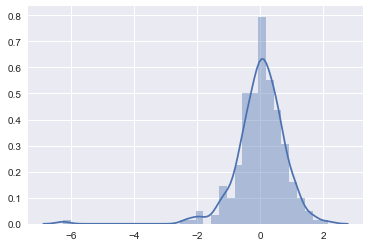

In [537]:
sns.distplot(res.resid)

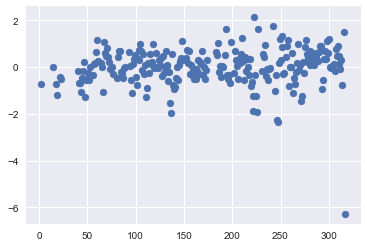

In [540]:
plt.scatter(res.resid.index,res.resid)

In [543]:
min(res.resid)

-6.2649791611873029

In [544]:
res.resid

2     -0.702062
15    -0.000952
18    -0.728516
19    -1.193441
22    -0.422183
23    -0.524526
40    -0.187588
41    -0.664548
42    -0.695545
43    -1.086278
44    -0.478683
46    -0.184725
47     0.208484
48    -1.271971
49    -0.535536
50    -0.516132
51    -0.270494
52    -0.566752
53    -0.003758
56    -0.320690
57     0.129376
58     0.167498
59     0.630590
60     1.170749
61     0.274545
64     0.170316
65    -0.008483
66    -1.050598
67     1.090684
68     0.602469
         ...   
287    0.407551
288    0.615238
289    0.244974
290    0.632709
291    0.897431
292    0.888512
293   -0.949697
294   -0.536148
295    0.361473
296    0.677898
297    0.356091
298    1.097109
299    0.596211
300    1.217460
301   -0.015349
302   -0.056329
303    0.060162
304    0.061143
305    0.149582
306   -0.150740
307    0.780519
308    0.469424
309    0.920531
310    0.463003
311    0.153846
312   -0.099787
313    0.318075
314   -0.784556
316    1.520716
317   -6.264979
dtype: float64

In [563]:
# this is the large outlier in the bottom corner
data_quart[248:]

,ROUTE_SHORT_NAME,STOP_ID,DIR,SEQ,HEADWAY_S,EOL,SOL,DWELL_S,RUNTIME_S,TOTTIME_S,SERVMILES_S,RUNSPEED_S,TOTSPEED_S,Route,STOP,Boardings,Alightings,STOP NAME_x,STOP NAME_y,Total_Pop,Total_Housing_Units,VAC_RATE,OCC_RATE,AVG_HH_SIZE,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,BART_TOS,BART_FROMS,CALTRAIN_OFF,CALTRAIN_ON,ON_BUS,HEADWAY_S_BUS,ONTIME5_BUS,OFF_BUS,NUM_BUS_STOPS,EDD_EMP,geometry_d,Alightings_e,Boardings_e,DIR_e,DWELL_S_e,EOL_e,HEADWAY_S_e,ROUTE_SHOR,RUNSPEED_S_e,RUNTIME_S_e,Route_e,SEQ_e,SERVMILES_,SOL_e,STOP_e,STOP_NAME,Sum_Id,Sum_Value,TOTSPEED_S_e,TOTTIME_S_e,FREQ_S,PARK_HOURLY_AVG_ON,TRANSBAY,EDHLTH_RAC_DEN,EDHLTH_WAC_DEN,EMP_RAC_DEN,EMP_WAC_DEN,HOUSING_09_DEN,LEISER_RAC_DEN,LEISER_WAC_DEN,OTHER_RAC_DEN,OTHER_WAC_DEN,SHR_HH_0VEH,SHR_INCOME_0_15,SHR_INCOME_100P,SHR_INCOME_15_50,SHR_INCOME_50_100,PARK_12_HR_OFF_PUB,PARK_1_HR_OFF_PUB,PARK_2_HR_OFF_PUB,PARK_3_HR_OFF_PUB,PARK_4_HR_OFF_PUB,PARK_DAY_OFF_PUB,PARK_DAY_DISCOUNT_OFF_PUB,RETAIL_RAC_DEN,RETAIL_WAC_DEN,AVG_TT_TO_WORK_MINUTES,PARKING_RATE_OFF_RESIDENTIAL,EXCLUDE,AVG_RIDE,LOG_RIDERS,AVG_BART,CALTRAIN_AVG,MUNI_BUS_AVG,PARK_12_HR_OFF_PUB_LOG,PARK_1_HR_OFF_PUB_LOG,PARK_2_HR_OFF_PUB_LOG,PARK_3_HR_OFF_PUB_LOG,PARK_4_HR_OFF_PUB_LOG,AVG_BART_LOG,AVG_HH_SIZE_LOG,AVG_TT_TO_WORK_MINUTES_LOG,BART_FROMS_LOG,BART_TOS_LOG,CALTRAIN_AVG_LOG,CALTRAIN_OFF_LOG,CALTRAIN_ON_LOG,PARK_DAY_DISCOUNT_OFF_PUB_LOG,PARK_DAY_OFF_PUB_LOG,DWELL_S_LOG,EDD_EMP_LOG,EDHLTH_RAC_DEN_LOG,EDHLTH_WAC_DEN_LOG,EMP_RAC_DEN_LOG,EMP_WAC_DEN_LOG,FREQ_S_LOG,HEADWAY_S_LOG,HH_DEN_ACS_LOG,PARK_HOURLY_AVG_ON_LOG,HOUSING_09_DEN_LOG,HU_DEN_ACS_LOG,LEISER_RAC_DEN_LOG,LEISER_WAC_DEN_LOG,NUM_BUS_STOPS_LOG,OCC_RATE_LOG,OFF_BUS_LOG,ON_BUS_LOG,ONTIME5_BUS_LOG,OTHER_RAC_DEN_LOG,OTHER_WAC_DEN_LOG,PARKING_RATE_OFF_RESIDENTIAL_LOG,POP_DEN_ACS_LOG,RETAIL_RAC_DEN_LOG,RETAIL_WAC_DEN_LOG,RUNSPEED_S_LOG,RUNTIME_S_LOG,SHR_HH_0VEH_LOG,SHR_INCOME_0_15_LOG,SHR_INCOME_100P_LOG,SHR_INCOME_15_50_LOG,SHR_INCOME_50_100_LOG,TOTSPEED_S_LOG,TOTTIME_S_LOG,Total_Housing_Units_LOG,Total_Pop_LOG,VAC_RATE_LOG,DIST_FROM_LAST_STOP,DIST_FROM_LAST_STOP_LOG,SERVMILES_S_LOG,CAL_STATION,CLOSE_STOP,EOL_SOL,SHR_INCOME_50P,SHR_INCOME_50P_LOG,J,KT,L,M,N,UNDERGROUND
317,N,7318,1,23.0,20.160884,0.0,0.0,0.0,665.36,665.36,132.756,11.98,11.98,N-JUDAH,Tunnel Entry,0,0,Sunset Tunnel East Portal,Sunset Tunnel East Portal,3619,1831,0.028946,0.971054,2.035433,49.782441,24.457911,25.186972,0.0,0.0,0.0,0.0,4444.806447,19.924671,0.674564,3795.50002,11,3243,POLYGON ((-122.4269882575403 37.76923367684583...,0,0,1,0.0,0.0,20.160884,N,11.98,665.36,N-JUDAH,23.0,132.756,0.0,Tunnel Entry,Sunset Tunnel East Portal,0,0,11.98,665.36,2.97606,0.0,0,772.677377,1007.881594,3752.647086,2304.623506,3513.098545,514.00269,521.521804,2232.731884,494.943568,0.349269,0.064679,0.448819,0.209224,0.277278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.235136,280.276541,32.1,0.719507,0,0.0,0.0,0.0,0.0,4120.153234,NaN,NaN,NaN,NaN,NaN,0.0,1.110354,3.499533,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,8.084562,6.651155,6.916598,8.230483,7.743106,1.380291,3.052154,3.237027,0.0,8.164538,3.265262,6.244172,6.258667,2.484907,0.678568,8.241835,8.399717,0.515553,7.711429,6.206462,0.542038,3.927551,5.456325,5.639338,2.56341,6.50183,0.299563,0.062674,0.370749,0.189979,0.244731,2.56341,6.50183,7.513164,8.194229,0.028535,1.858666,1.050355,4.896017,0,0,0.0,0.726097,0.545863,0,0,0,0,1,0


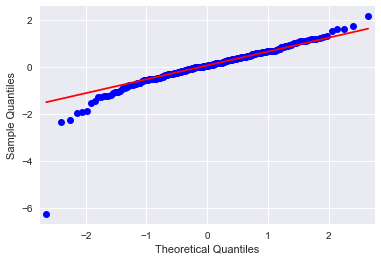

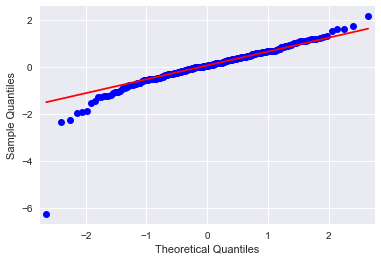

In [564]:
smf.graphics.qqplot(res.resid,line = 'q')

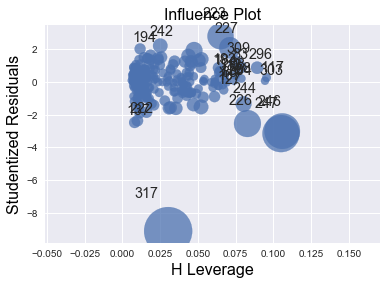

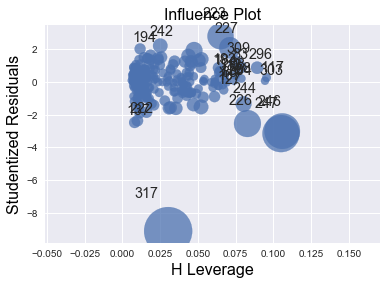

In [565]:
smf.graphics.influence_plot(res)

In [572]:
dropped = data_quart[['LOG_RIDERS','EDD_EMP_LOG','STOP_ID','AVG_RIDE','FREQ_S_LOG','EOL_SOL','HOUSING_09_DEN_LOG','MUNI_BUS_AVG','AVG_BART_LOG','CLOSE_STOP']].dropna()

In [574]:
dropped.to_csv('E:/Transit-Casa-Alex/MUNI Rail/Output/Modeling/2009/Final_Model_Data_Post_Drop.csv')